In [57]:
##############TASK05 

In [58]:
import osmnx as ox
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Load the datasets
accidents_data = pd.read_csv('C:/Users/erica/Desktop/Accident_Info.csv', encoding='latin1')
vehicles_data = pd.read_csv('C:/Users/erica/Desktop/Vehicle_Info.csv', encoding='latin1')

C:\Users\erica\AppData\Local\Temp\ipykernel_19612\2597831531.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents_data = pd.read_csv('C:/Users/erica/Desktop/Accident_Info.csv', encoding='latin1')


In [59]:
# Merge the datasets on 'Accident_Index'
merged_data = pd.merge(accidents_data, vehicles_data, on='Accident_Index')

In [60]:
# Analyze patterns related to road conditions
road_condition_counts = merged_data['Road_Surface_Conditions'].value_counts()
print("Road Surface Conditions:")
print(road_condition_counts)

Road Surface Conditions:
Road_Surface_Conditions
Dry                             1435328
Wet or damp                      566505
Frost or ice                      37419
Snow                              12989
Data missing or out of range       3586
Flood over 3cm. deep               2581
Name: count, dtype: int64


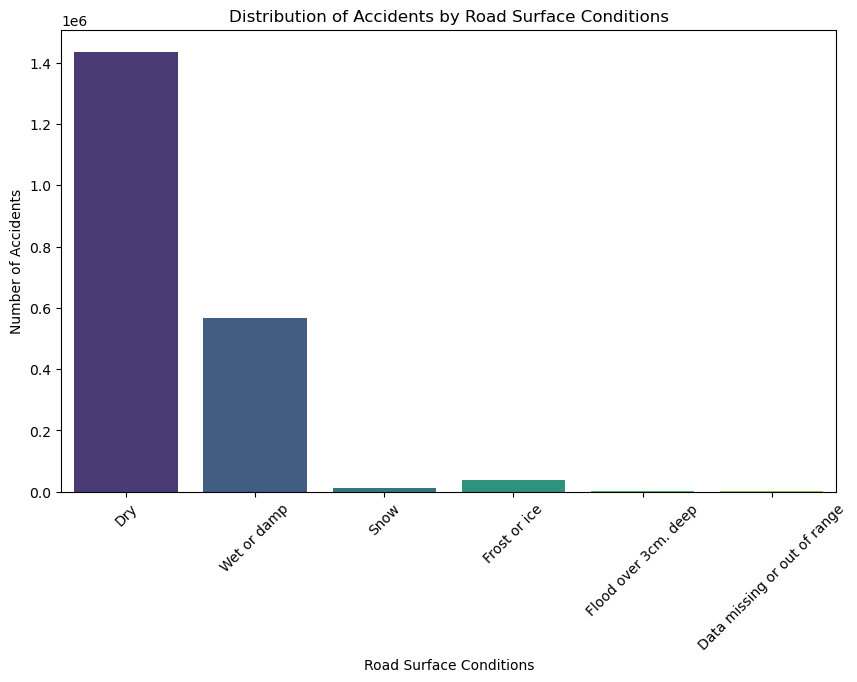

In [106]:
# Analyze road conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='Road_Surface_Conditions', palette='viridis')
plt.title('Distribution of Accidents by Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

In [62]:
# Analyze patterns related to weather
weather_counts = merged_data['Weather_Conditions'].value_counts()
print("Weather Conditions:")
print(weather_counts)

Weather Conditions:
Weather_Conditions
Fine no high winds              1661250
Raining no high winds            238560
Other                             40903
Unknown                           36908
Raining + high winds              27813
Fine + high winds                 25433
Snowing no high winds             13574
Fog or mist                       11152
Snowing + high winds               2635
Data missing or out of range        180
Name: count, dtype: int64


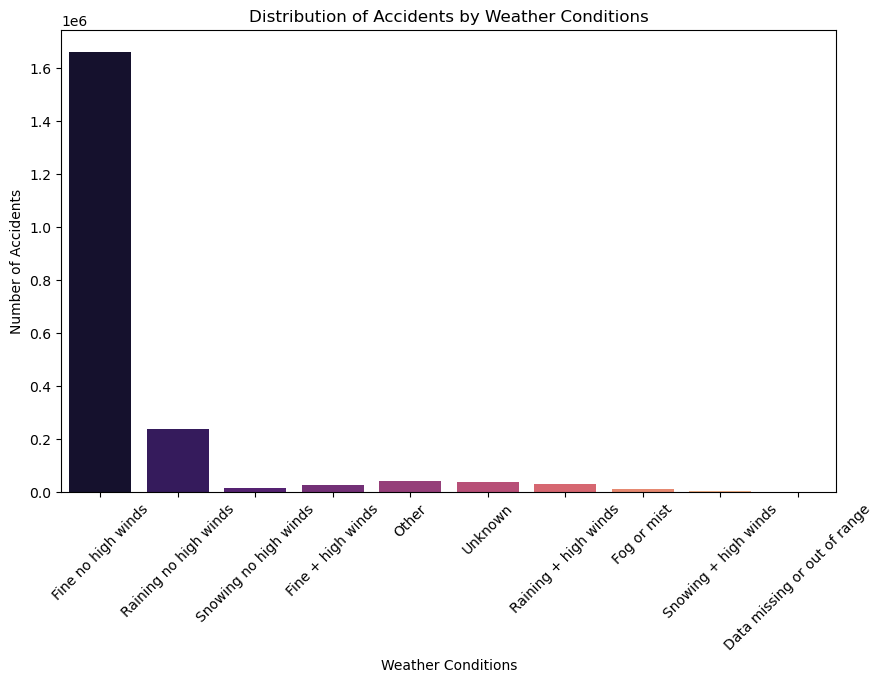

In [107]:
# Analyze weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='Weather_Conditions', palette='magma')
plt.title('Distribution of Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

In [65]:
# Analyze patterns related to time of day
merged_data['Time'] = pd.to_datetime(merged_data['Time'])
merged_data['Hour'] = merged_data['Time'].dt.hour
hourly_accidents = merged_data.groupby('Hour').size()
print("Hourly Accident Counts:")
print(hourly_accidents)

C:\Users\erica\AppData\Local\Temp\ipykernel_19612\438635640.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['Time'] = pd.to_datetime(merged_data['Time'])


Hourly Accident Counts:
Hour
0.0      25229
1.0      18044
2.0      13700
3.0      11616
4.0       9592
5.0      15497
6.0      37452
7.0      92210
8.0     153714
9.0     106513
10.0     98114
11.0    113320
12.0    127540
13.0    130599
14.0    131365
15.0    157842
16.0    171980
17.0    188901
18.0    141973
19.0    101681
20.0     71908
21.0     55813
22.0     47764
23.0     35895
dtype: int64


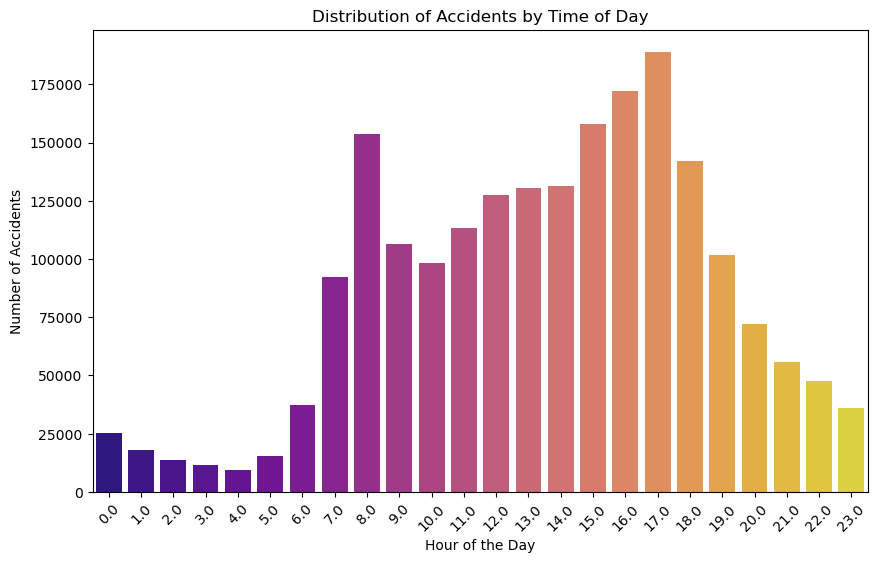

In [108]:
# Analyze time of day
merged_data['Time'] = pd.to_datetime(merged_data['Time'])
merged_data['Hour'] = merged_data['Time'].dt.hour
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='Hour', palette='plasma')
plt.title('Distribution of Accidents by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

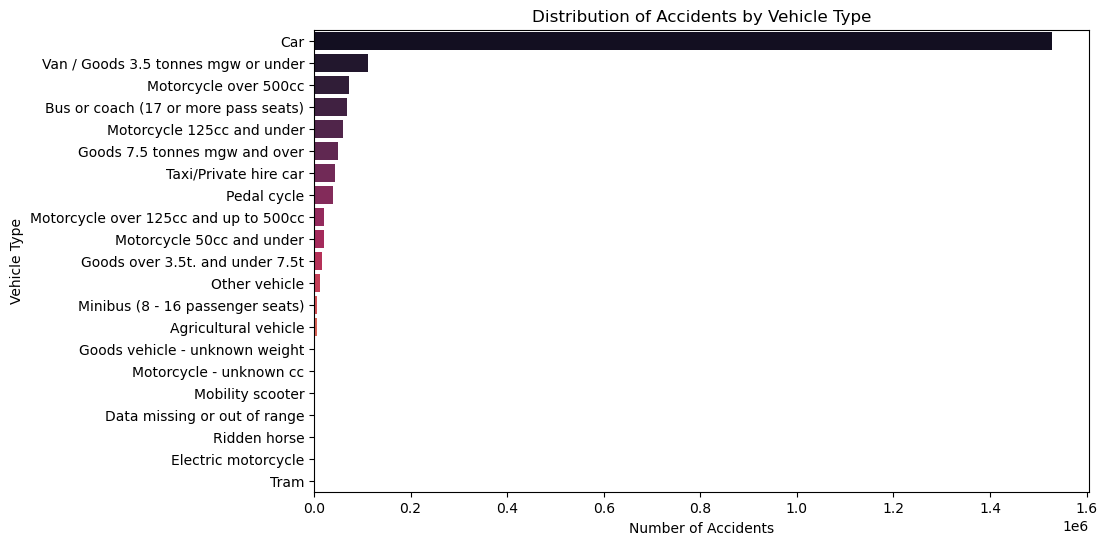

In [110]:
# Analyze contributing factors
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, y='Vehicle_Type', palette='rocket', order=merged_data['Vehicle_Type'].value_counts().index)
plt.title('Distribution of Accidents by Vehicle Type')
plt.xlabel('Number of Accidents')
plt.ylabel('Vehicle Type')
plt.show()

In [91]:
# Download road network for the desired location
location = "UK"
G = ox.graph_from_place(location, network_type='all')

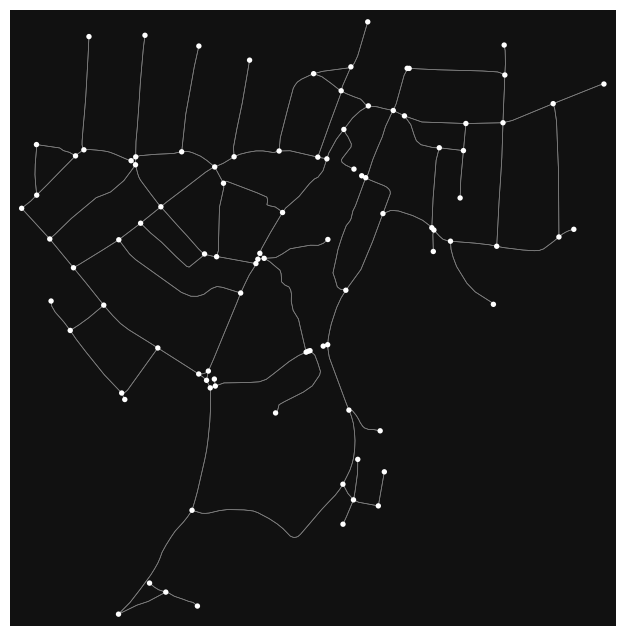

In [92]:
# Plot the road network
fig, ax = ox.plot_graph(G, figsize=(12, 8), show=False, close=False, edge_color='gray', edge_linewidth=0.5)

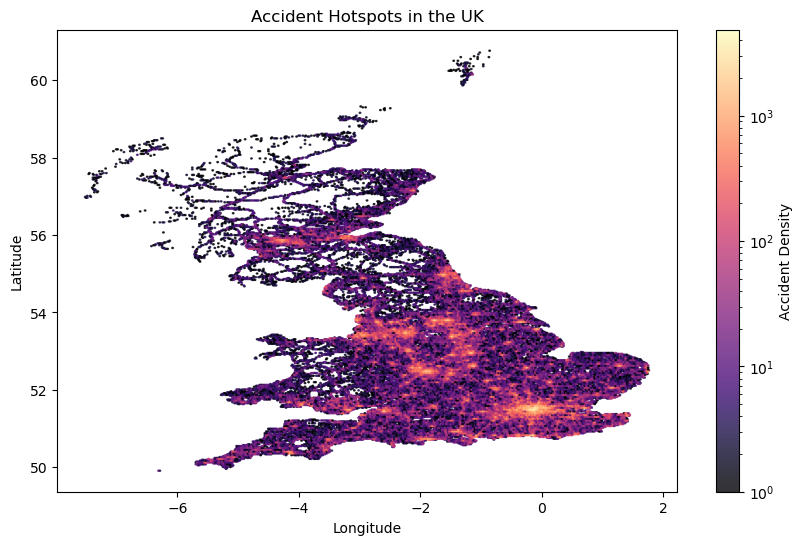

In [93]:
# Plot accident hotspots with density representation
plt.figure(figsize=(10, 6))
plt.hexbin(merged_data['Longitude'], merged_data['Latitude'], gridsize=400, cmap='magma', norm=LogNorm(), alpha=0.8)
plt.colorbar(label='Accident Density')
plt.title('Accident Hotspots in the UK')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(visible=False)
plt.show()

Here's a summary of the steps performed to analyze traffic accident data and visualize related patterns:

1. **Data Loading**: 
   - Loaded traffic accident data from the dataset.
   - Examined the structure and content of the dataset to understand its columns and values.

2. **Data Preprocessing**:
   - Checked for missing values and handled them appropriately (e.g., imputation or removal).
   - Converted relevant columns to appropriate data types (e.g., datetime).

3. **Exploratory Data Analysis (EDA)**:
   - Analyzed patterns related to road conditions by examining the distribution of accidents across different road surface conditions.
   - Explored weather conditions and their impact on accidents by visualizing the frequency of accidents under different weather conditions.
   - Investigated the time of day and its relationship with accident occurrence by plotting the distribution of accidents over different hours of the day.

4. **Visualization**:
   - Visualized accident hotspots by plotting a heatmap of accident density across geographical coordinates (latitude and longitude).
   - Used hexbin plots or kernel density estimation (KDE) for visualizing accident hotspots with density representation.
   - Created additional visualizations such as bar charts, pie charts, or stacked bar plots to explore contributing factors to accidents (e.g., vehicle types, contributing factors).

5. **Insights and Interpretation**:
   - Derived insights from the visualizations to understand patterns and trends in traffic accidents related to road conditions, weather, time of day, accident hotspots, and contributing factors.
   - Interpreted the findings to identify potential areas for intervention or improvement in road safety measures.

By following these steps, we gain valuable insights into traffic accident data, which can inform decision-making processes aimed at improving road safety and reducing accident rates.